In [272]:
import pandas as pd
import os

# Use raw string or double backslashes to avoid syntax errors
dataset_folder = r"C:\Users\User\Desktop\Capstone Project\Datasets"  

all_files = [f for f in os.listdir(dataset_folder) if f.endswith('.csv')]
print("CSV files found:", all_files)

CSV files found: ['resale-flat-prices-based-on-approval-date-2000-feb-2012.csv', 'resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv', 'resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv', 'ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv']


In [202]:
type(all_files)

list

In [204]:
# Load all CSV files into dataframes
dataframes = {}
for file in all_files:
    file_path = os.path.join(dataset_folder, file)
    df = pd.read_csv(file_path)
    dataframes[file] = df
    print(f"\nLoaded '{file}' with shape: {df.shape}")


Loaded 'resale-flat-prices-based-on-approval-date-2000-feb-2012.csv' with shape: (369651, 10)

Loaded 'resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv' with shape: (37153, 11)

Loaded 'resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv' with shape: (52203, 10)

Loaded 'ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv' with shape: (169584, 11)


In [206]:
# Check for missing values
for file in all_files:
    print(file)
    df=dataframes[file]
    print(df.isnull().sum())
    print(f"\nData types in '{file}':")
    print(df.dtypes)
    if 'remaining_lease' in df.columns and df['remaining_lease'].dtypes != 'int64':
        print(f"\nOriginal 'remaining_lease' samples in '{file}':")
        print(df['remaining_lease'].head())
               


resale-flat-prices-based-on-approval-date-2000-feb-2012.csv
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

Data types in 'resale-flat-prices-based-on-approval-date-2000-feb-2012.csv':
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
dtype: object
resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0

In [268]:
# Loop through each CSV file
for file in all_files:
    print(file)
    df = dataframes[file]

    # Check if 'remaining_lease' column exists
    if 'remaining_lease' in df.columns:
        if df['remaining_lease'].dtypes != 'int64':
            print("Found 'remaining_lease' column. Sample values:")
            print(df['remaining_lease'].head())
    
            # Extract numeric part (e.g., '92 years' → 92)
            df['remaining_lease_years'] = df['remaining_lease'].str.extract(r'(\d+)').astype(float)
            print("\nConverted 'remaining_lease_years':")
            print(df['remaining_lease_years'].head())
        else:
            df['remaining_lease_years'] = df['remaining_lease']
    else:
        print("Column 'remaining_lease' not found in this file.")


resale-flat-prices-based-on-approval-date-2000-feb-2012.csv
Column 'remaining_lease' not found in this file.
resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv
resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv
Column 'remaining_lease' not found in this file.
ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv
Found 'remaining_lease' column. Sample values:
0    61 years 04 months
1    60 years 07 months
2    62 years 05 months
3     62 years 01 month
4    62 years 05 months
Name: remaining_lease, dtype: object

Converted 'remaining_lease_years':
0    61.0
1    60.0
2    62.0
3    62.0
4    62.0
Name: remaining_lease_years, dtype: float64


In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

for file in all_files:
    print(file)
    df = dataframes[file]   

resale-flat-prices-based-on-approval-date-2000-feb-2012.csv
resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv
resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv
ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv


In [212]:
 # Handle datetime
for file in all_files:
    print(file)
    df = dataframes[file]
    if 'month' in df.columns:
        df['month'] = pd.to_datetime(df['month'], errors='coerce')
        df['year'] = df['month'].dt.year
        df['month_only'] = df['month'].dt.month

resale-flat-prices-based-on-approval-date-2000-feb-2012.csv
resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv
resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv
ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv


In [216]:
# Drop NA for plotting
for file in all_files:
    print(file)
    df = dataframes[file]
df = df.dropna(subset=['resale_price'])

resale-flat-prices-based-on-approval-date-2000-feb-2012.csv
resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv
resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv
ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv


In [220]:
for file in all_files:
    df = pd.read_csv(file)
    print("File: " , file, "\n df: \n", df.head())

File:  resale-flat-prices-based-on-approval-date-2000-feb-2012.csv 
 df: 
      month        town flat_type block       street_name storey_range  \
0  2000-01  ANG MO KIO    3 ROOM   170  ANG MO KIO AVE 4     07 TO 09   
1  2000-01  ANG MO KIO    3 ROOM   174  ANG MO KIO AVE 4     04 TO 06   
2  2000-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     07 TO 09   
3  2000-01  ANG MO KIO    3 ROOM   215  ANG MO KIO AVE 1     07 TO 09   
4  2000-01  ANG MO KIO    3 ROOM   218  ANG MO KIO AVE 1     07 TO 09   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  
0            69.0        Improved                 1986      147000.0  
1            61.0        Improved                 1986      144000.0  
2            73.0  New Generation                 1976      159000.0  
3            73.0  New Generation                 1976      167000.0  
4            67.0  New Generation                 1976      163000.0  
File:  resale-flat-prices-based-on-registration-date-from-ja

resale-flat-prices-based-on-approval-date-2000-feb-2012.csv


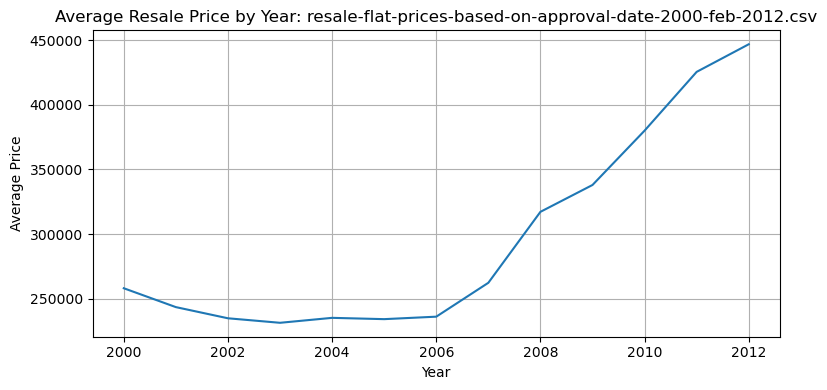

resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv


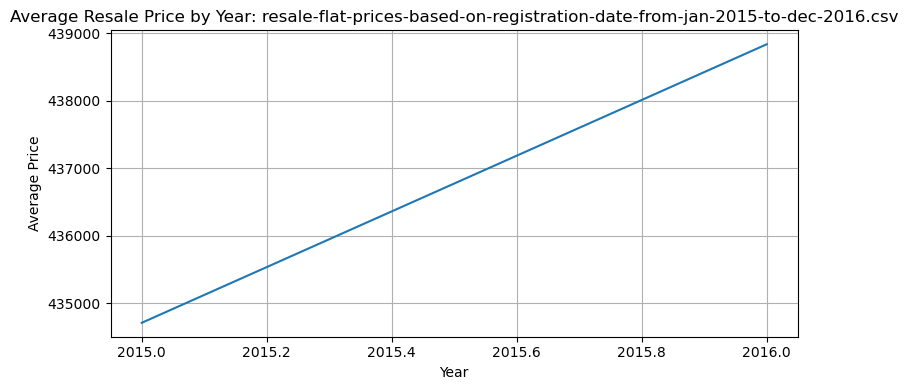

resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv


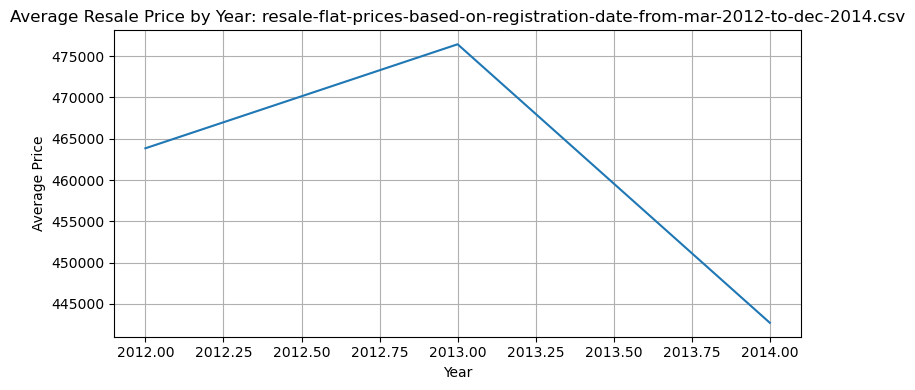

ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv


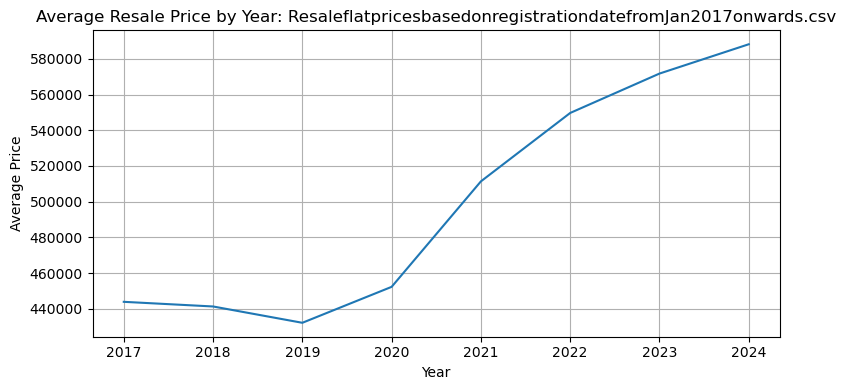

In [222]:
 # --- 1. Price trend by year ---
for file in all_files:
    print(file)
    df = dataframes[file]
    if 'year' in df.columns:
        plt.figure(figsize=(8, 4))
        yearly_avg = df.groupby('year')['resale_price'].mean()
        sns.lineplot(x=yearly_avg.index, y=yearly_avg.values)
        plt.title(f'Average Resale Price by Year: {file}')
        plt.xlabel('Year')
        plt.ylabel('Average Price')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    

In [218]:
all_files

['resale-flat-prices-based-on-approval-date-2000-feb-2012.csv',
 'resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv',
 'resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv',
 'ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv']

resale-flat-prices-based-on-approval-date-2000-feb-2012.csv


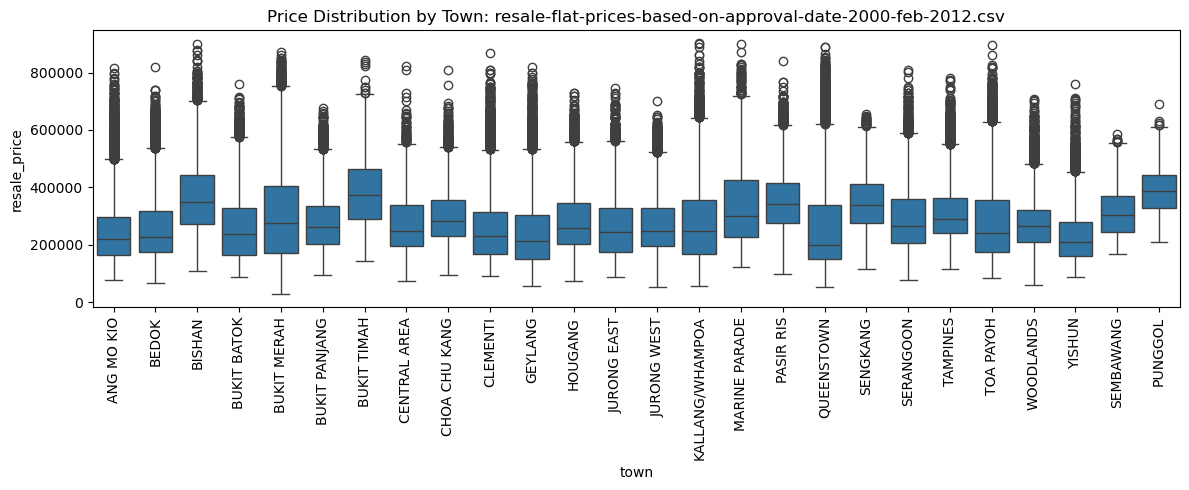

resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv


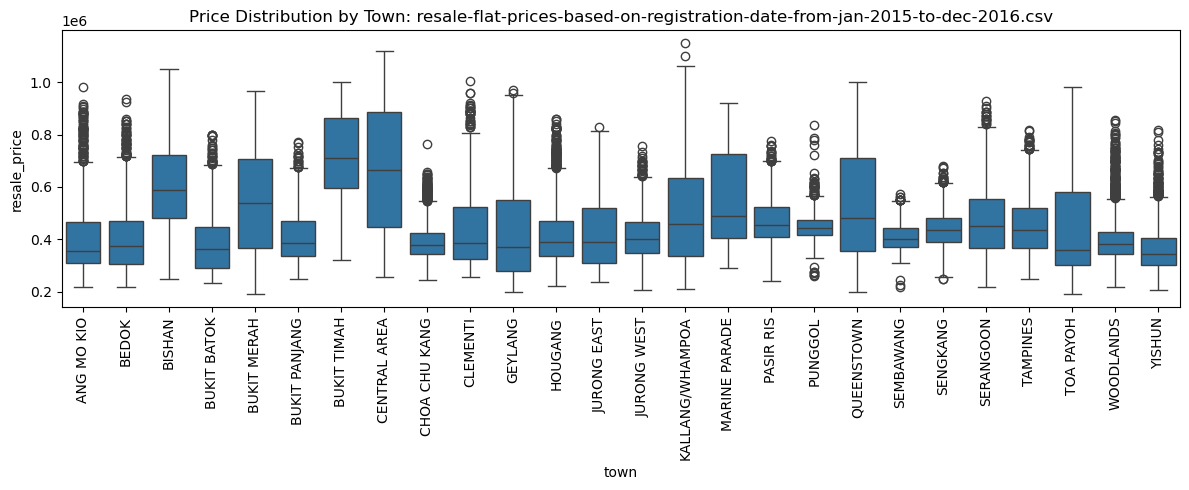

resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv


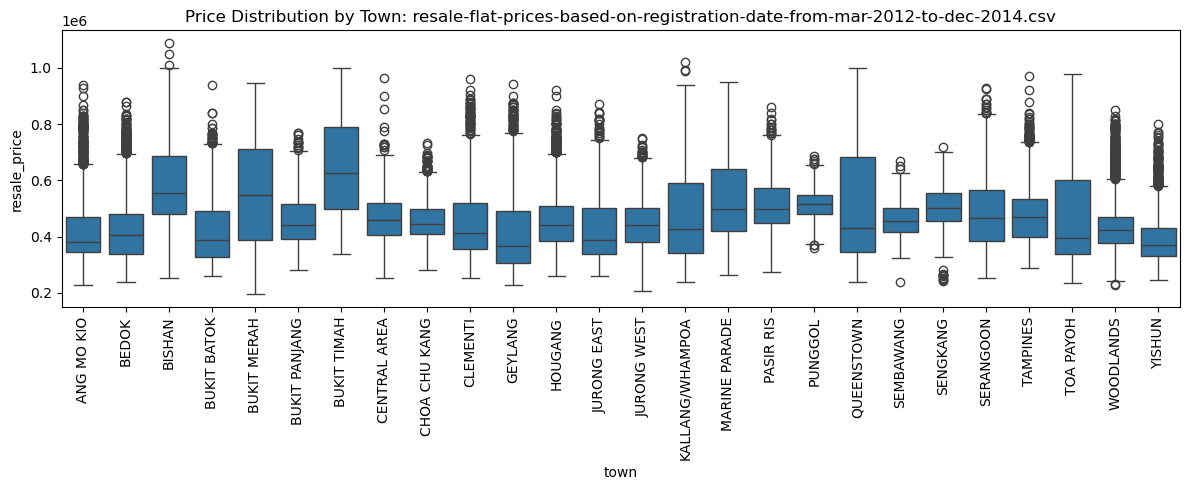

ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv


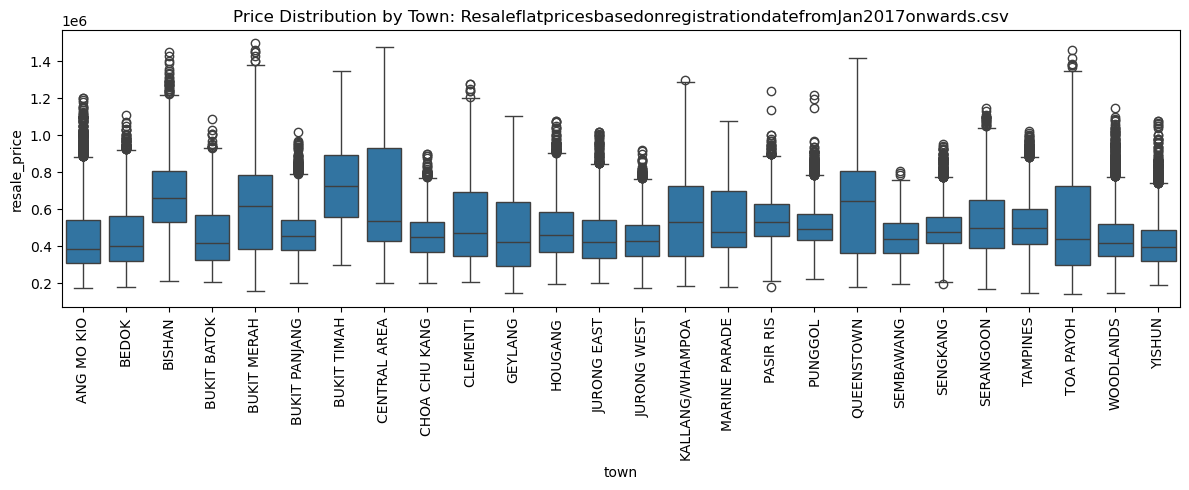

In [224]:
  # --- 2. Price by Town ---
for file in all_files:
    print(file)
    df = dataframes[file]
    if 'town' in df.columns:
        plt.figure(figsize=(12, 5))
        sns.boxplot(data=df, x='town', y='resale_price')
        plt.xticks(rotation=90)
        plt.title(f'Price Distribution by Town: {file}')
        plt.tight_layout()
        plt.show()

resale-flat-prices-based-on-approval-date-2000-feb-2012.csv


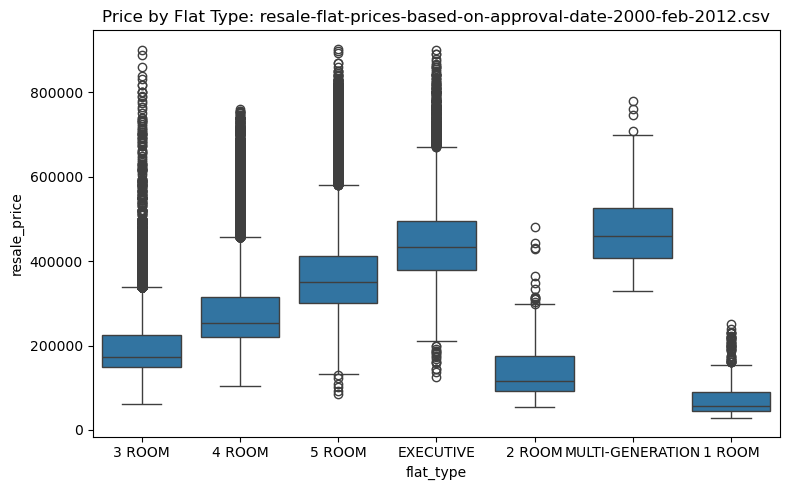

resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv


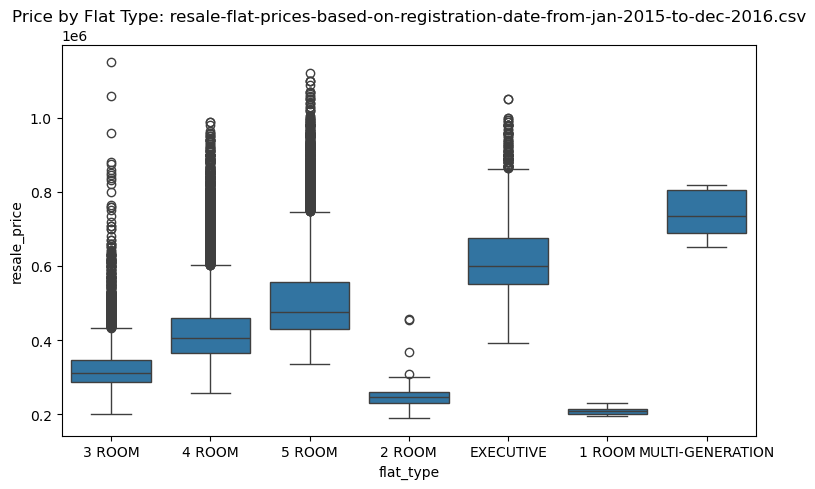

resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv


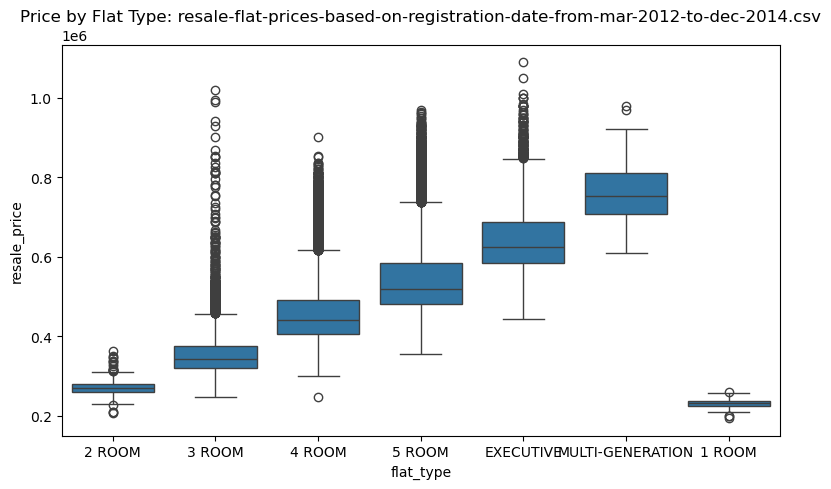

ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv


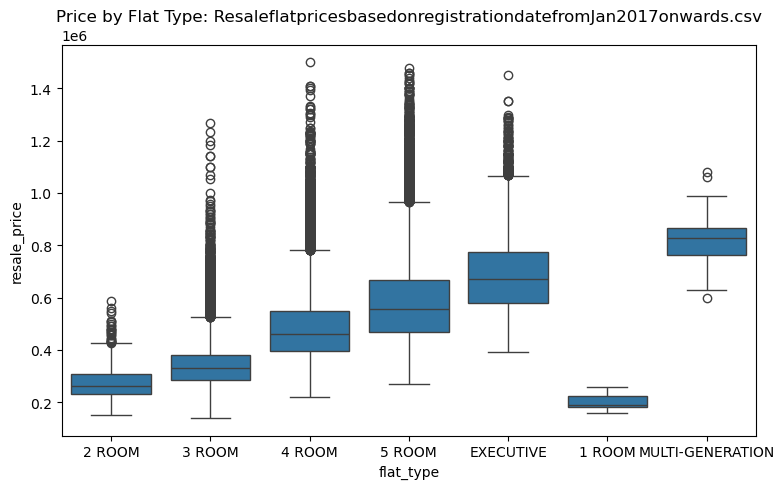

In [226]:
# --- 3. Price by Flat Type ---
for file in all_files:
    print(file)
    df = dataframes[file]
    if 'flat_type' in df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x='flat_type', y='resale_price')
        plt.title(f'Price by Flat Type: {file}')
        plt.tight_layout()
        plt.show()

resale-flat-prices-based-on-approval-date-2000-feb-2012.csv


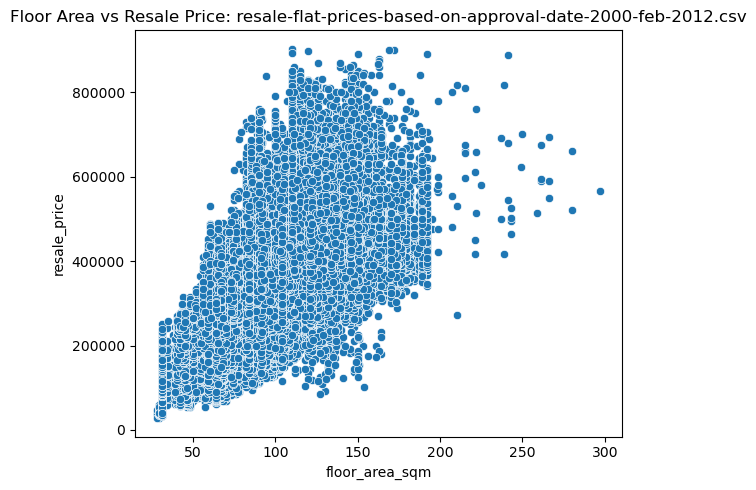

resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv


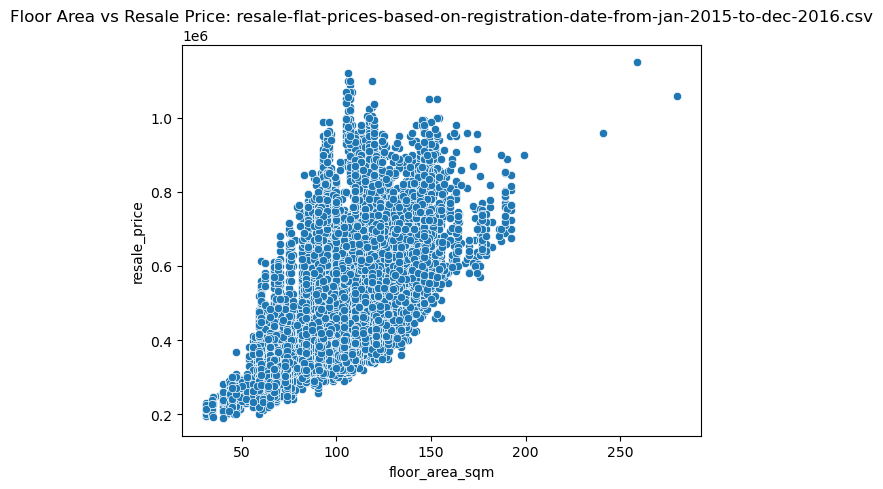

resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv


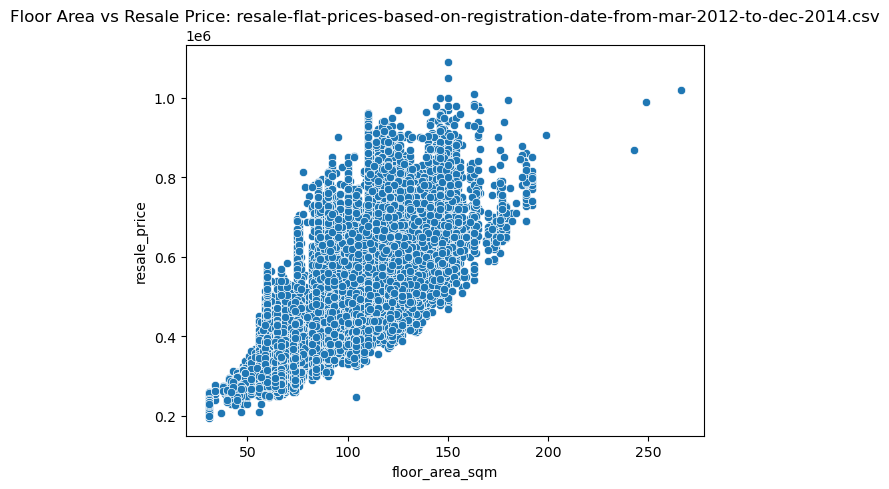

ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv


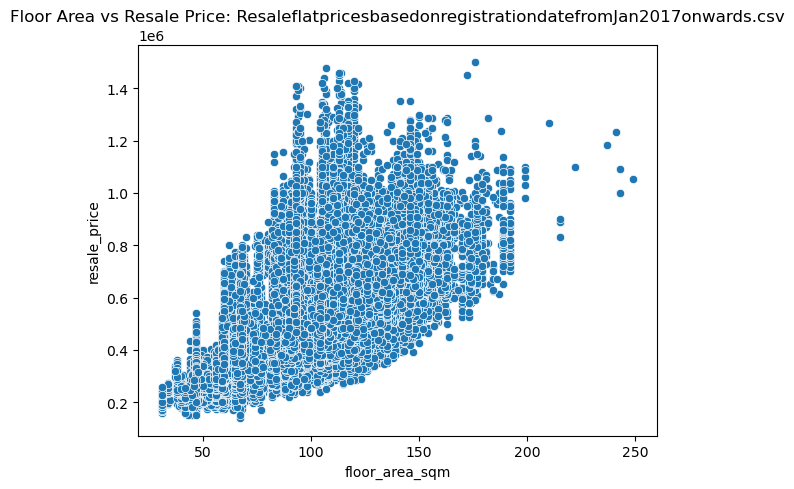

In [228]:
# --- 4. Floor Area vs Price ---
for file in all_files:
    print(file)
    df = dataframes[file]
    if 'floor_area_sqm' in df.columns:
        plt.figure(figsize=(6, 5))
        sns.scatterplot(data=df, x='floor_area_sqm', y='resale_price')
        plt.title(f'Floor Area vs Resale Price: {file}')
        plt.tight_layout()
        plt.show()

resale-flat-prices-based-on-approval-date-2000-feb-2012.csv
resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv


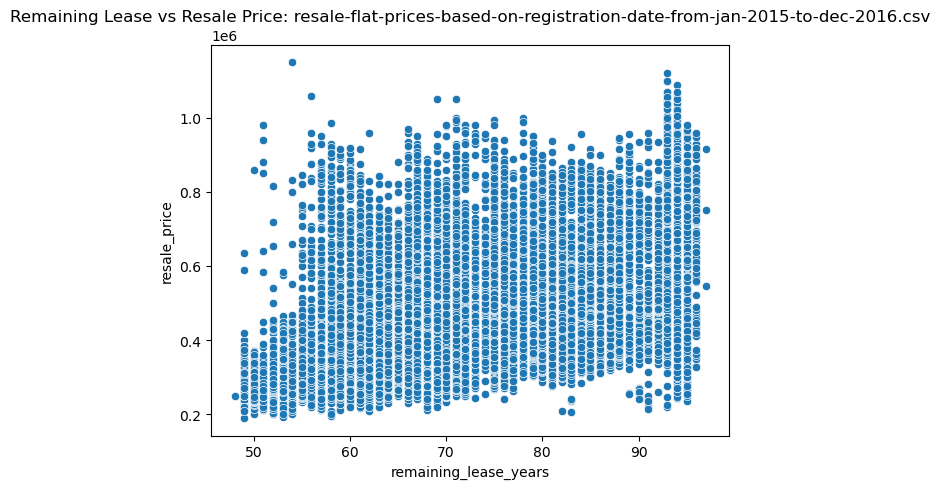

resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv
ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv


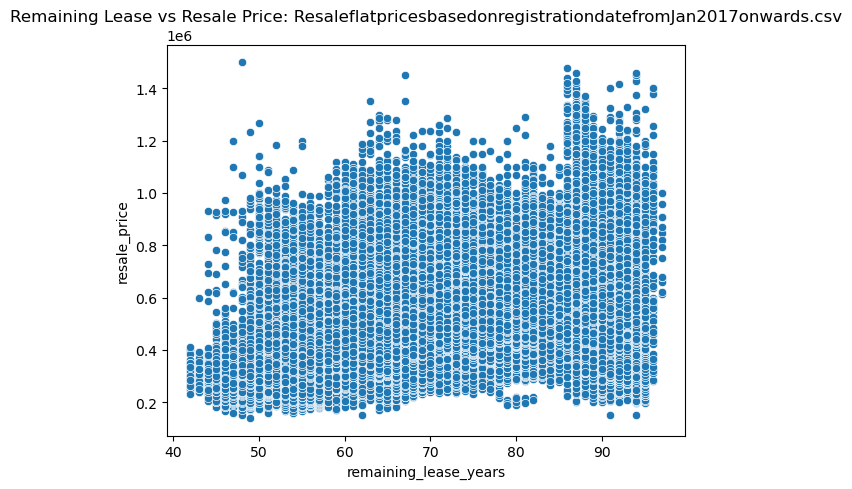

In [270]:
 # --- 5. Remaining Lease vs Price ---
for file in all_files:
    print(file)
    df = dataframes[file]
    if 'remaining_lease_years' in df.columns:
        plt.figure(figsize=(6, 5))
        sns.scatterplot(data=df, x='remaining_lease_years', y='resale_price')
        plt.title(f'Remaining Lease vs Resale Price: {file}')
        plt.tight_layout()
        plt.show()

resale-flat-prices-based-on-approval-date-2000-feb-2012.csv


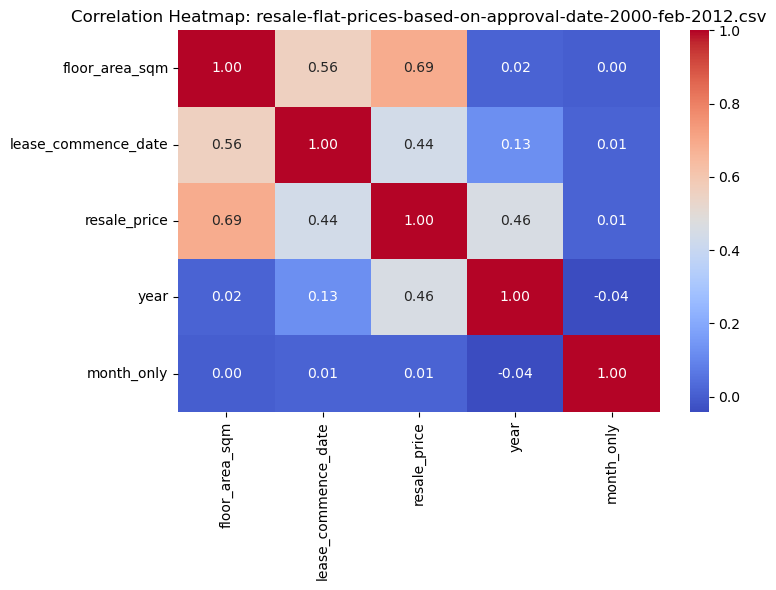

resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv


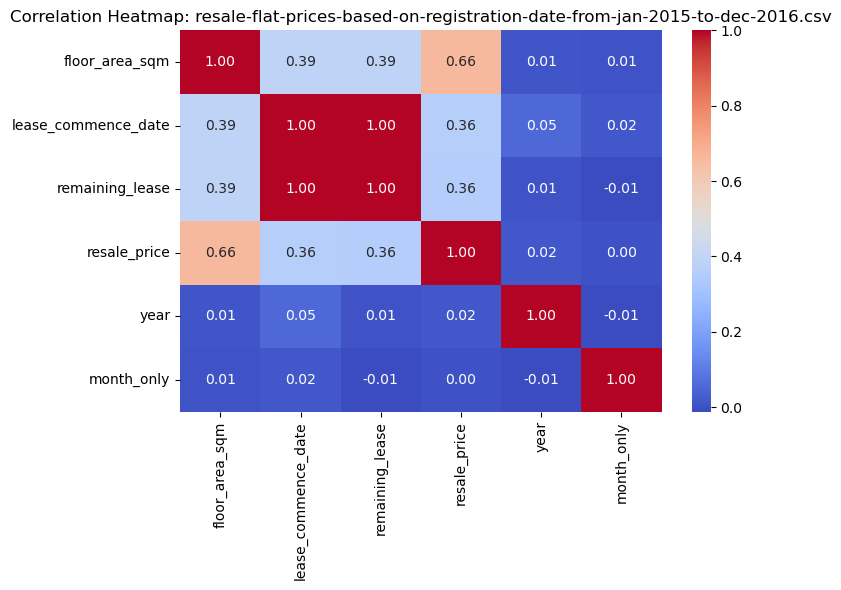

resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv


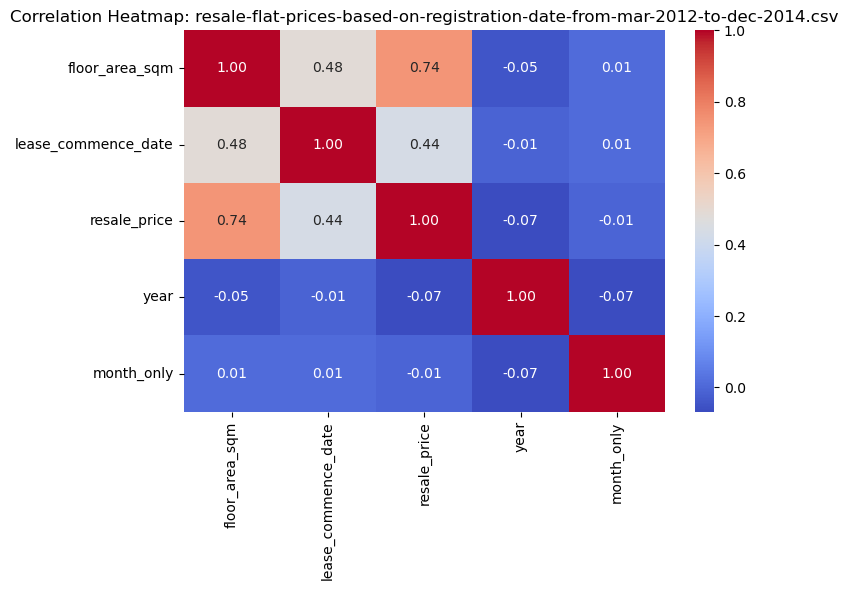

ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv


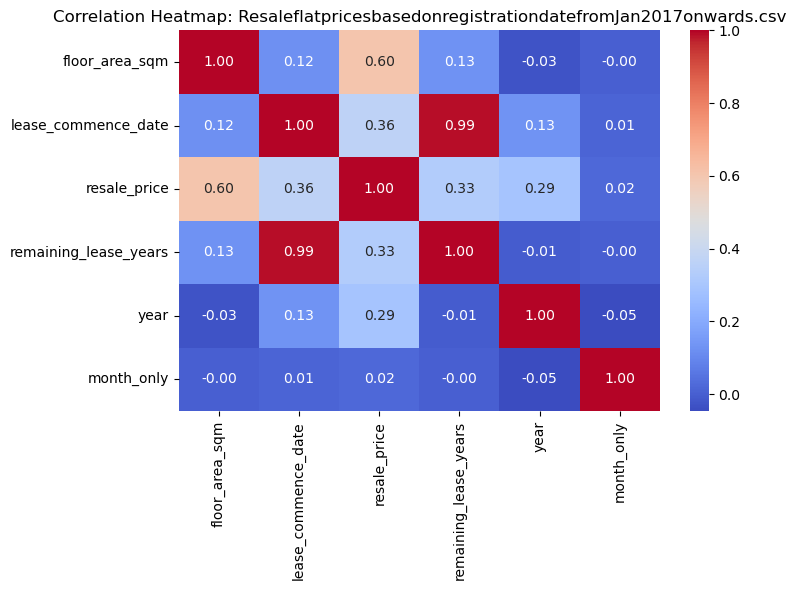

In [232]:
 # --- 6. Correlation Heatmap ---
for file in all_files:
    print(file)
    df = dataframes[file]
    numeric_df = df.select_dtypes(include=['number'])
    if not numeric_df.empty:
        plt.figure(figsize=(8, 6))
        corr = numeric_df.corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f'Correlation Heatmap: {file}')
        plt.tight_layout()
        plt.show()

In [234]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [236]:
for file in all_files:
    print(file)
    df = dataframes[file]

resale-flat-prices-based-on-approval-date-2000-feb-2012.csv
resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv
resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv
ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv


In [238]:
# Ensure required columns exist
required_cols = ['resale_price', 'floor_area_sqm', 'flat_type', 'town']
if not all(col in df.columns for col in required_cols):
    print(f"Skipping {file}: missing required columns.")

In [240]:
 # Convert remaining lease
if 'remaining_lease' in df.columns and 'remaining_lease_years' not in df.columns:
    df['remaining_lease_years'] = df['remaining_lease'].str.extract(r'(\d+)').astype(float)
if 'remaining_lease_years' not in df.columns:
    print(f"Skipping {file}: missing remaining_lease information.")

In [242]:
# Drop missing values
df = df.dropna(subset=['resale_price', 'floor_area_sqm', 'remaining_lease_years'])

In [244]:
 # Features and target
features = ['floor_area_sqm', 'remaining_lease_years', 'flat_type', 'town']
target = 'resale_price'

In [246]:
X = df[features]
y = df[target]

In [248]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [250]:
# Preprocessor
categorical_features = ['flat_type', 'town']
numerical_features = ['floor_area_sqm', 'remaining_lease_years']

In [252]:
 preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ]
    )

In [254]:
# Linear Regression
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [256]:
# Random Forest
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [257]:
 # Results
print("\nLinear Regression:")
print("  RMSE:", round(np.sqrt(mean_squared_error(y_test, lr_preds)), 2))
print("  R²:", round(r2_score(y_test, lr_preds), 4))


Linear Regression:
  RMSE: 92180.01
  R²: 0.7096


In [258]:
print("\nRandom Forest:")
print("  RMSE:", round(np.sqrt(mean_squared_error(y_test, rf_preds)), 2))
print("  R²:", round(r2_score(y_test, rf_preds), 4))


Random Forest:
  RMSE: 56034.67
  R²: 0.8927
